In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount("/content/drive") 

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# !unzip dataset

In [ ]:

def CalculateMelSpectrogram(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.melspectrogram(y=y, sr=sr)
    melSpec_dB = librosa.power_to_db(melSpec)
    dim = (32, 32)
    resized = cv2.resize(melSpec_dB, dim, interpolation = cv2.INTER_AREA)
    return resized

if not os.path.exists("processed_data"):
  os.mkdir("processed_data")
x=[]
y=[]
Total=23071
count=0
for i in os.listdir("dataset"): #[0,,9]
  for j in os.listdir("dataset/0"+i): # 
    x.append(CalculateMelSpectrogram("dataset/"+i+"/"+j))
    y.append(int(i))
    count+=1
    if count%300==0:
      print(Total-count)  
x=np.array(x)
y=np.array(y)
np.save("X",x)
np.save("y",y)

In [ ]:
# y, sr = librosa.load("test.opus",res_type='kaiser_fast')
# whale_song, _ = librosa.effects.trim(y)
# librosa.display.waveplot(whale_song, sr=sr);

In [ ]:
import numpy as np
x=np.load("X.npy",allow_pickle=True)
y=np.load("y.npy",allow_pickle=True)
print(x.shape, y.shape)

(23071, 32, 32) (23071,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
# np.save("x_train",x_train)
# np.save("y_train",y_train)
# np.save("x_test",x_test)
# np.save("y_test",y_test)
import tensorflow as tf
import numpy as np 

files_path = '/content/drive/MyDrive/audd saved files/FSDD'


x_train = np.load(files_path+"/X_{}_train.npy".format(feature), allow_pickle=True)


x_test = np.load("x_test.npy",allow_pickle=True) 
y_train = np.load("y_train.npy", allow_pickle=True)
y_train =tf.keras.utils.to_categorical(y_train , num_classes=10)
y_test = np.load("y_test.npy",allow_pickle=True)
y_test =tf.keras.utils.to_categorical(y_test , num_classes=10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [ ]:
# fig = plt.figure(figsize=(10, 7))
# # setting values to rows and column variables
# rows = 5
# columns = 2
# for i in np.unique(y):
#   # plt.imshow(x[y==i][0])
#   fig.add_subplot(rows, columns, i+1)
#   plt.imshow(x[y==i][0])
#   plt.axis('off')
#   plt.title(str(i))
  

Train

In [ ]:
# Load all training, testing files

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split


files_path = '/content/drive/MyDrive/audd saved files/FSDD'

features = ['mel_spectrogram', 'mfcc', 'zero_crossing_rate']

feature = features[2]
print("Feature = ", feature)

x_train = np.load(files_path+"/x_{}_train.npy".format(feature), allow_pickle=True)

y_train = np.load(files_path+"/y_{}_train.npy".format(feature), allow_pickle=True)
y_train =tf.keras.utils.to_categorical(y_train , num_classes=10)

x_test = np.load(files_path+"/x_{}_test.npy".format(feature),allow_pickle=True) 

y_test = np.load(files_path+"/y_{}_test.npy".format(feature),allow_pickle=True) 
y_test =tf.keras.utils.to_categorical(y_test , num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)


Feature =  zero_crossing_rate


In [ ]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

In [ ]:
import tensorflow as tf 
import numpy as np 
import cv2 

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
def GetCNN():
  model = models.Sequential()
  
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())
  
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.1))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))# fully connected
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.1))
  
  model.add(layers.Dense(10,activation='softmax', use_bias=True))
  return model 

def getModel(modelName="ResNet50", input_shape=(32,32,1)):

  input_layr = tf.keras.Input(shape=input_shape)


  # Xception, VGG16, VGG19,ResNet101,ResNet152, InceptionV3, InceptionResNetV2,MobileNet,MobileNetV2,DenseNet121,DenseNet169,DenseNet201,EfficientNetB0,EfficientNetB1.. B7
  
  model=None 
  if modelName=="CNN":
    model = GetCNN()
    return model
  elif modelName=="Xception":
    model = tf.keras.applications.Xception(weights=None,
                                              include_top = False, 
                                              input_tensor=input_layr,
                                              )
  elif modelName=="ResNet50":
    model = tf.keras.applications.ResNet50(weights=None,
                                              include_top = False, 
                                             )
  elif modelName=="ResNet101":
    model = tf.keras.applications.ResNet101(weights=None,
                                              include_top = False
                                              )
  elif modelName=="ResNet152":
    model = tf.keras.applications.ResNet152(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  elif modelName=="VGG16":
    model = tf.keras.applications.VGG16(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape
                                              )

  elif modelName=="VGG19":
    model = tf.keras.applications.VGG19(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  elif modelName=="InceptionResNetV2":
    model = tf.keras.applications.InceptionResNetV2(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  elif modelName=="MobileNet":
    model = tf.keras.applications.MobileNet(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  elif modelName=="MobileNetV2":
    model = tf.keras.applications.MobileNetV2(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  elif modelName=="DenseNet121":
    model = tf.keras.applications.DenseNet121(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  elif modelName=="DenseNet201":
    model = tf.keras.applications.DenseNet201(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)
  
  elif "EfficientNet" in modelName:
    dic ={}
    models=[tf.keras.applications.EfficientNetB0(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB1(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB2(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB3(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB4(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB5(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB6(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape),
            tf.keras.applications.EfficientNetB7(weights=None,
                                              include_top = False, 
                                              input_shape = input_shape)]
    for i in range(8):
      dic["EfficientNetB"+str(i)] = i 
    
    
    model = models[dic[modelName]]


  gap = tf.keras.layers.GlobalMaxPooling2D()(model.output)
  output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)
  final_model = tf.keras.Model(model.input, output)
  return final_model
# x_train = 100 , 32 x 32  
# 32 x 32 x 1  
x_test = x_test.reshape((x_test.shape[0],32,32,1))
x_train = x_train.reshape((x_train.shape[0],32,32,1))
x_val = x_val.reshape((x_val.shape[0],32,32,1))

In [ ]:
x_train.shape

(1920, 32, 32, 1)

# Training Model 

In [ ]:
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint
model_path = '/content/drive/MyDrive/audd saved files/FSDD/models'

acc={}
batch_size=256
epochs=150
Models= ["EfficientNetB0"] #"EfficientNetB0","EfficientNetB1"] 
        #  "DenseNet121","DenseNet169","DenseNet201"] #,
        #  
        #  "VGG16", "VGG19","ResNet101","ResNet152", 
        #  "DenseNet121","DenseNet169","DenseNet201", ] 
# Done = ["MobileNet","MobileNetV2",Xception, "EfficientNetB0","EfficientNetB1" , 
# "EfficientNetB2","EfficientNetB3","EfficientNetB4","EfficientNetB5", ,"EfficientNetB6","EfficientNetB7" ]
# Done = []
for modelName in Models:
  acc[modelName]=[] 
  print("Training ", modelName)
  final_model = getModel(modelName=modelName)
  final_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
  callbacks = ModelCheckpoint(model_path+"/"+modelName+"_{}_.h5".format(feature), monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True,
                                    verbose=1)
  final_model.summary()
  history = final_model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_val, y_val), epochs=epochs, verbose = 1  ,callbacks=[callbacks])
  np.save(model_path+"/{}_{}_history.npy".format(feature, modelName),history)
  hist_df = pd.DataFrame(history.history) 
  hist_df.to_csv(model_path+"/"+modelName+"_{}_CSV_.csv".format(feature))
  acc[modelName].append(final_model.evaluate(x_test,y_test)[1])
df =pd.DataFrame(acc)
df.to_csv(model_path+"/"+Models[0]+"{}.csv".format(feature))

Training  EfficientNetB0
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 rescaling_40 (Rescaling)       (None, 32, 32, 1)    0           ['input_53[0][0]']               
                                                                                                  
 normalization_40 (Normalizatio  (None, 32, 32, 1)   3           ['rescaling_40[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 1)    0           ['

In [ ]:
acc

{'EfficientNetB0': [0.6116666793823242]}

In [ ]:
import numpy as np
def ensemble_models_predictions(predictions):
  """
  Parameter:
  predictions: list of prediction
  """
  ensembled_prediction = np.sum(predictions, axis=0)

  return np.argmax(ensembled_prediction, axis=1)

In [ ]:
import sklearn
import keras
import sklearn.metrics as metrics
models_path = '/content/drive/MyDrive/audd saved files/gujrati dataset/models'

x_test_mfcc = np.load('/content/drive/MyDrive/audd saved files/x_mfcc_test.npy',allow_pickle=True)
y_test_mfcc = np.load('/content/drive/MyDrive/audd saved files/y_mfcc_test.npy',allow_pickle=True)

x_test_zcr = np.load('/content/drive/MyDrive/audd saved files/x_zero_crossing_rate_test.npy',allow_pickle=True)
y_test_zcr = np.load('/content/drive/MyDrive/audd saved files/y_zero_crossing_rate_test.npy',allow_pickle=True)

x_test_mp = np.load('/content/drive/MyDrive/audd saved files/x_mel_spectrogram_test.npy',allow_pickle=True)
y_test_mp = np.load('/content/drive/MyDrive/audd saved files/y_mel_spectrogram_test.npy',allow_pickle=True)


mfcc_model = keras.models.load_model(models_path+"/MobileNet_mfcc_.h5")
mp_model = keras.models.load_model(models_path+"/MobileNet_mel_spectrogram_.h5")
zcr_model = keras.models.load_model(models_path+"/MobileNet_zero_crossing_rate_.h5")

mfcc_predictions = mfcc_model.predict(x_test_mfcc,batch_size=10)
zcr_predictions = zcr_model.predict(x_test_zcr,batch_size=10)
mp_predictions = mp_model.predict(x_test_mp,batch_size=10)



In [ ]:
lists = [mp_predictions,zcr_predictions]

result = ensemble_models_predictions(lists)

# calculate accuracy

acc = metrics.accuracy_score(y_test_mp, result)
print(acc)

0.7191765980498375


In [ ]:
tf.keras.utils.plot_model(final_model, to_file="model.png", show_shapes=True)

NameError: ignored

# Loading Training Model 

In [ ]:
from tensorflow import keras
models = ["MobileNet","MobileNetV2","Xception", "EfficientNetB0","EfficientNetB1" , "EfficientNetB2",
          "EfficientNetB3","EfficientNetB4","EfficientNetB5", "EfficientNetB6","EfficientNetB7" ]
dc={}
for model in models:
  dc[model] = []
for model in models:
  pth = "/content/drive/MyDrive/"+model+"_"+str(count)+"_.h5"
  f_model = keras.models.load_model(pth)
  dc[model].append(f_model.evaluate(x_test,y_test)[1])



In [ ]:
import pandas as pd
df=pd.DataFrame(dc)
df

,MobileNet,MobileNetV2,Xception,EfficientNetB0,EfficientNetB1,EfficientNetB2,EfficientNetB3,EfficientNetB4,EfficientNetB5,EfficientNetB6,EfficientNetB7
0,0.415601,0.219718,0.903575,0.844420,0.853304,0.840520,0.868906,0.846804,0.830986,0.860022,0.871723
1,0.472373,0.348212,0.891874,0.861538,0.863489,0.840520,0.854171,0.845504,0.855688,0.786349,0.482774
2,0.412351,0.151679,0.880823,0.843987,0.852004,0.859372,0.859805,0.857638,0.823835,0.801950,0.164897


In [ ]:
df.to_csv("accuracies.csv")

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h
df = pd.read_csv("CNN.csv")
for i in df.columns:
  a,b=mean_confidence_interval(df[i].values)
  print(i,a,b)

Unnamed: 0 1.0 2.484137711843753
CNN 0.8627663254737854 0.012243036429866553


# Plot 

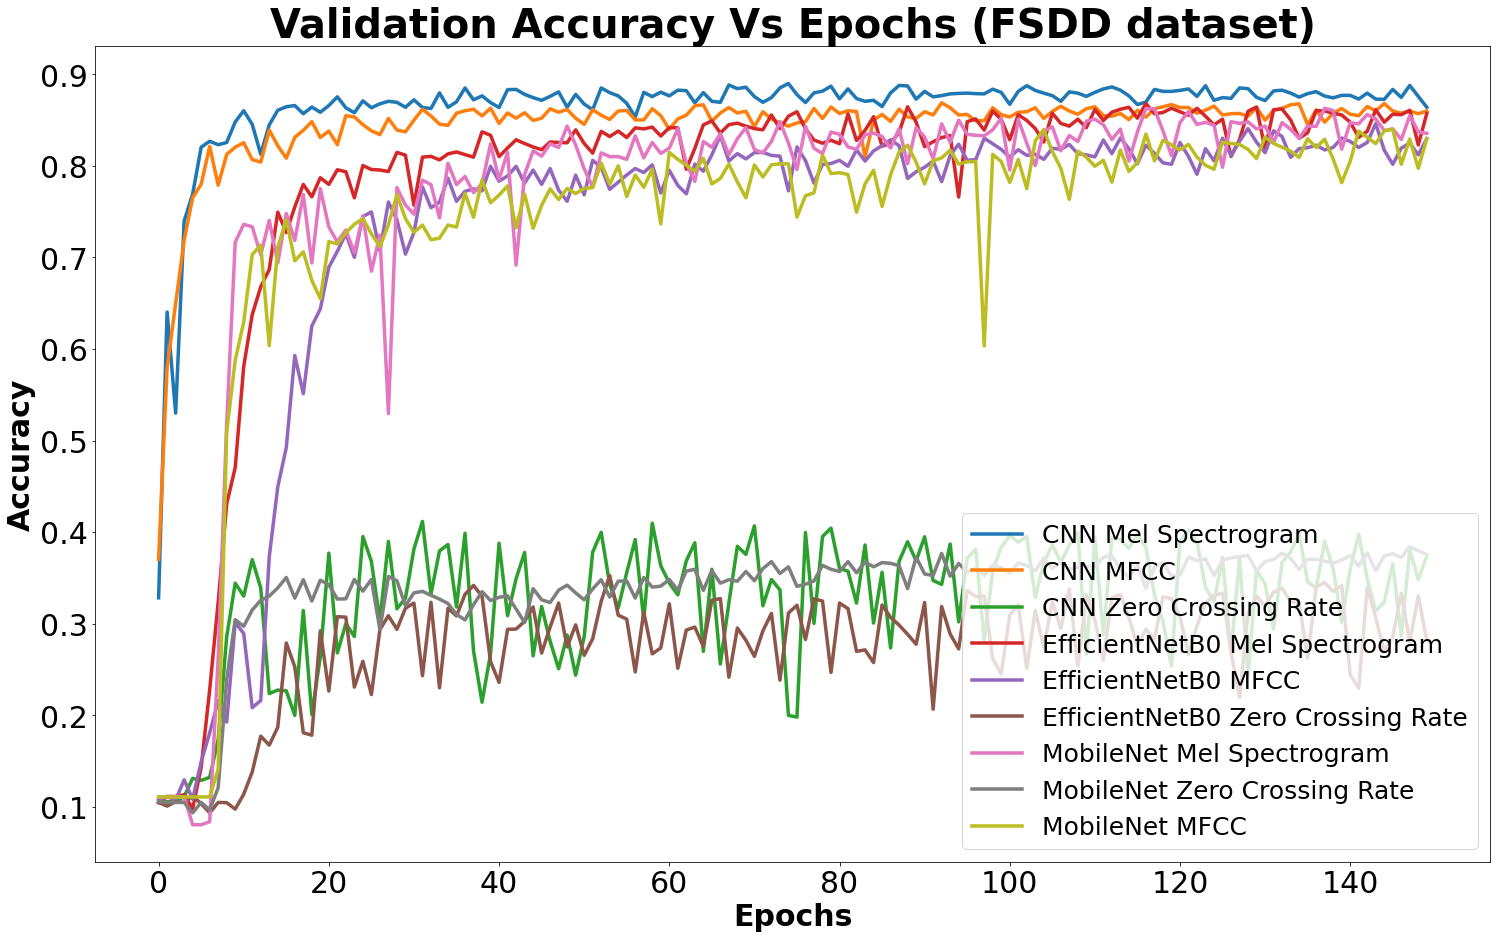

In [ ]:
# get all files
import pandas as pd
path = "/content/drive/MyDrive/audd saved files/models/"
models = {"CNN Mel Spectrogram":"CNN_mel_spectrogram_CSV_.csv", "CNN MFCC":"CNN_mfcc_CSV_.csv","CNN Zero Crossing Rate":"CNN_zero_crossing_rate_CSV_.csv","EfficientNetB0 Mel Spectrogram":"EfficientNetB0_mel_spectrogram_CSV_.csv",
          "EfficientNetB0 MFCC":"EfficientNetB0_mfcc_CSV_.csv","EfficientNetB0 Zero Crossing Rate":"EfficientNetB0_zero_crossing_rate_CSV_.csv","MobileNet Mel Spectrogram":"MobileNet_mel_spectrogram_CSV_.csv",
          "MobileNet Zero Crossing Rate":"MobileNet_zero_crossing_rate_CSV_.csv", "MobileNet MFCC":"MobileNet_mfcc_CSV_.csv"}

plt.figure(figsize=(25,15))

for i,j in models.items():
  pth = path+j
  df=pd.read_csv(pth)
  plt.plot(range(len(df)),df["val_accuracy"],label=i,linewidth=3.5);

plt.rc('legend', fontsize=25)
plt.title("Validation Accuracy Vs Epochs (FSDD dataset)", fontsize=40,fontweight="bold")
plt.xlabel('Epochs',fontsize=30, fontweight="bold")
plt.ylabel('Accuracy', fontsize=30,fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='lower right')
plt.savefig("accuracy.png",transparent=True ,dpi=250)

In [ ]:
import pandas as pd
models = ["CNN",  "EfficientNetB0","EfficientNetB1" , "EfficientNetB2",
          "EfficientNetB3","EfficientNetB4","EfficientNetB5", "EfficientNetB6","EfficientNetB7" ]
dc={}
plt.figure(figsize=(25,15))
for model in models:
  dc[model] = []
for model in models:
    pth = "/content/drive/MyDrive/"+model+"_0_.csv"
    df=pd.read_csv(pth)
    plt.plot(range(len(df)),df["val_accuracy"],label=model,linewidth=3.5);
plt.rc('legend', fontsize=25)
plt.title("Validation Accuracy Vs Epochs", fontsize=40,fontweight="bold")
plt.xlabel('Epochs',fontsize=30, fontweight="bold")
plt.ylabel('Accuracy', fontsize=30,fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.savefig("accuracy.png",transparent=True ,dpi=250)

FileNotFoundError: ignored

<Figure size 1800x1080 with 0 Axes>

Training

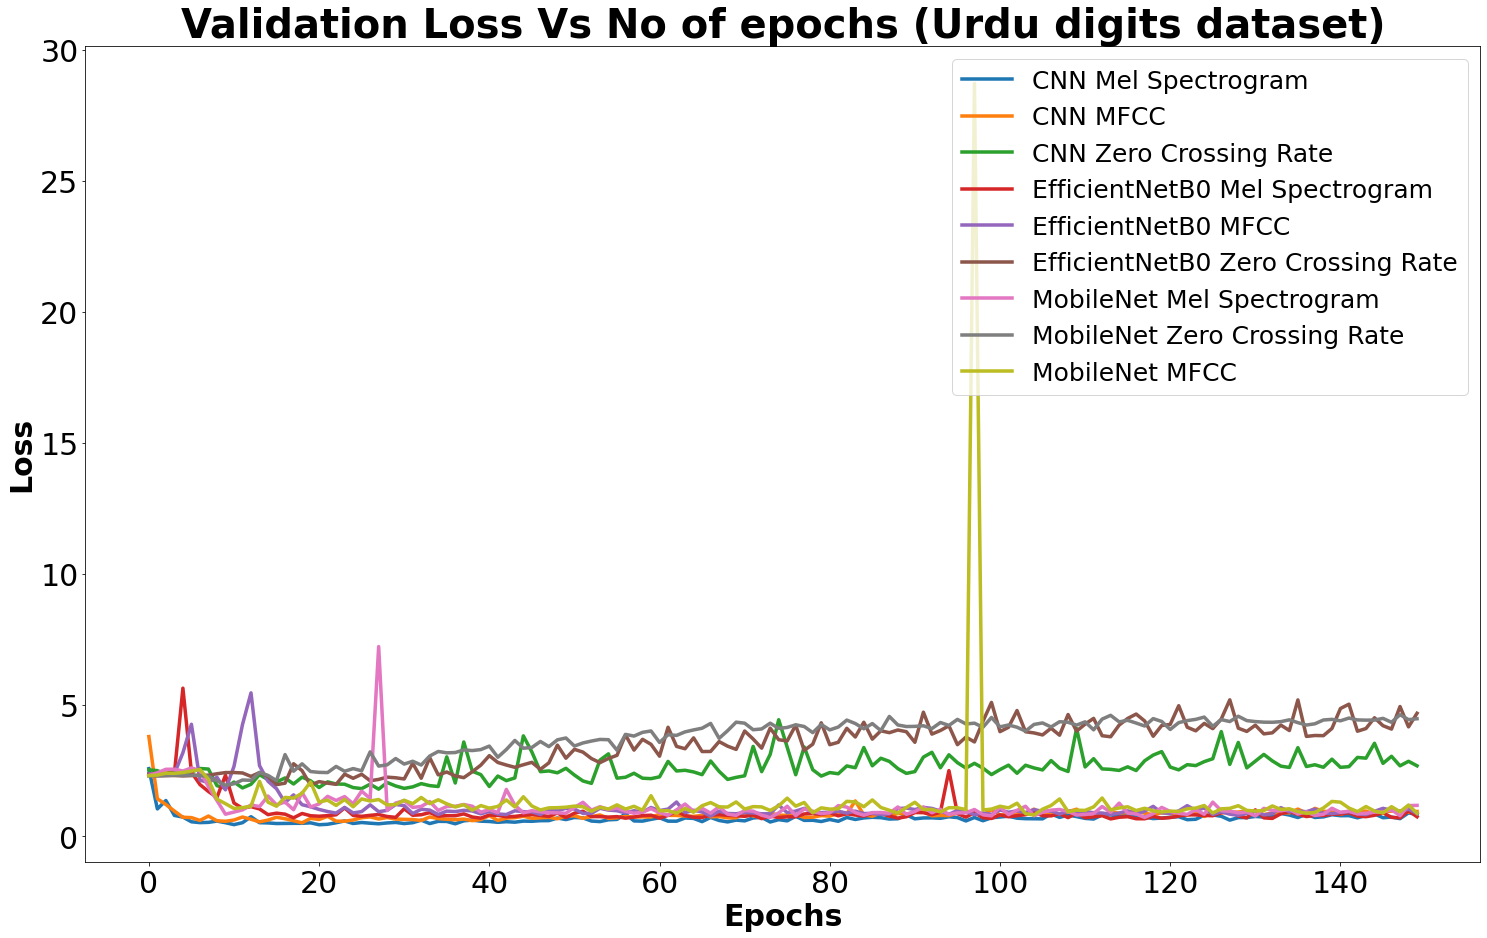

In [ ]:
# loss plots

plt.figure(figsize=(25,15))
for i,j in models.items():
  pth = path+j
  df=pd.read_csv(pth)
  plt.plot(range(len(df)),df["val_loss"],label=i,linewidth=3.5);

plt.rc('legend', fontsize=25)
plt.title('Validation Loss Vs No of epochs (Urdu digits dataset)', fontsize=40,fontweight="bold")
plt.xlabel('Epochs',fontsize=30, fontweight="bold")
plt.ylabel('Loss', fontsize=30,fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='upper right')
plt.show()


In [ ]:
 df.to_csv(models[0]+".csv")

In [ ]:
df

,Xception
0,0.878007
1,0.891874
2,0.880823
3,0.873456
4,0.867606
